          x        y             z
0  0.000010  0.00001  4.741210e-07
1  0.000011  0.00001  4.596223e-07
2  0.000011  0.00001  4.424620e-07
3  0.000011  0.00001  4.285433e-07
4  0.000011  0.00001  4.196529e-07


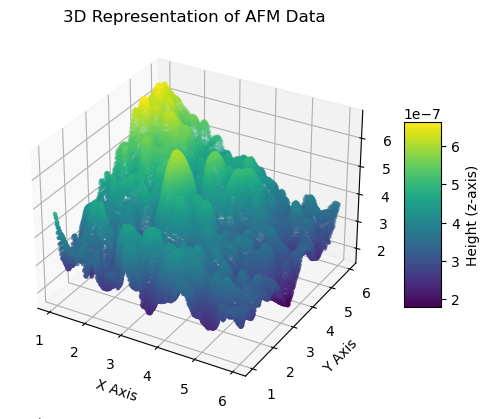

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the provided file
file_path = r'C:\Users\judit\OneDrive\Desktop\2.xyz'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y', 'z'])

# Display the first few rows of the dataset
print(data.head())

# Create a 3D plot for the AFM data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(data['x'], data['y'], data['z'], c=data['z'], cmap='viridis', marker='.')

# Adding color bar to indicate the height values
colorbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Height (z-axis)')

# Setting labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Representation of AFM Data')

# Show the plot
plt.show()


In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.graph_objs as go
import pandas as pd

# Load the additional AFM data
file_path = import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV data
file_path = 'path_to_your_csv_file.csv'
data = pd.read_csv(file_path)

# Assuming the CSV has columns named 'x', 'y', and 'z'
x = data['x']
y = data['y']
z = data['z']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')

# Setting labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Representation of AFM Data')

# Setting scientific notation for axes
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

plt.show()

# Filter the data within the specified y-range
filtered_data = data[(data['y'] >= 0.00006) & (data['y'] <= 0.0001)]

# Group the filtered data by y-axis values and calculate the average z-value for each y to create a profile plot
profile_data_y = filtered_data.groupby('y')['z'].mean().reset_index()

# Create a 2D plot for the y-axis vs. height (z-axis)
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['y'], profile_data_y['z'], label='Average Height Profile', color='green')

# Highlighting the boundary area along the y-axis within the specified range
boundary_y = profile_data_y.loc[profile_data_y['z'].diff().abs().idxmax()]['y']
plt.axvline(x=boundary_y, color='orange', linestyle='--', label='Boundary')

# Adding labels and title
plt.xlabel('Position (y-axis)')
plt.ylabel('Height (z-axis)')
plt.title('Height Profile Along Y-Axis')
plt.legend()

# Setting scientific notation for axes
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.grid(True)
plt.show()

data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y', 'z'])

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['x'],
    y=data['y'],
    z=data['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=data['z'],                # set color to an array/list of desired values
        colorscale='Viridis',            # choose a colorscale
        opacity=0.8
    )
)])

# Set plot title and axis labels
fig.update_layout(
    title='3D Representation of AFM Data',
    scene = dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis')
)

# Save the interactive plot as an HTML file
fig.write_html("interactive_afm_plot.html")


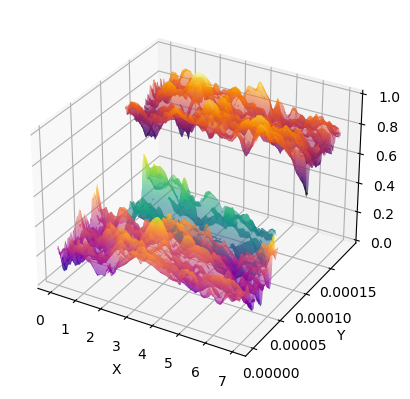

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the datasets
#"C:\Users\judit\OneDrive\Desktop\Dataset1\Boundary.xyz"
file_path_1 = r'C:\Users\judit\OneDrive\Desktop\Dataset1\Boundary.xyz'
file_path_2 = r'C:\Users\judit\OneDrive\Desktop\Dataset1\unirradiated.xyz'
file_path_4 = r'C:\Users\judit\OneDrive\Desktop\Dataset1\irradiated.xyz'

afm_data_1 = pd.read_csv(file_path_1, delim_whitespace=True, header=None)
afm_data_2 = pd.read_csv(file_path_2, delim_whitespace=True, header=None)
afm_data_4 = pd.read_csv(file_path_4, delim_whitespace=True, header=None)

# Extract the columns from each dataset
x1, y1, z1 = afm_data_1[0], afm_data_1[1], afm_data_1[2]
x2, y2, z2 = afm_data_2[0], afm_data_2[1], afm_data_2[2]
x4, y4, z4 = afm_data_4[0], afm_data_4[1], afm_data_4[2]

# Find the min and max Y values for translation
min_y1 = y1.min()
max_y1 = y1.max()
max_y2 = y2.max()
min_y4 = y4.min()

# Calculate the Y axis translations
translation_y2 = min_y1 - max_y2
y2_translated = y2 + translation_y2

translation_y4 = max_y1 - min_y4
y4_translated = y4 + translation_y4

# Calculate the Z adjustments
#z_adjustment_2 = z1.iloc[y1.idxmin()] - z2.iloc[y2.idxmax()]
#z2_adjusted = z2 + z_adjustment_2

#z_adjustment_4 = z1.iloc[y1.idxmax()] - z4.iloc[y4.idxmin()]
#z4_adjusted = z4 + z_adjustment_4

# Calculate the minimum values across all datasets
min_x = min(x1.min(), x2.min(), x4.min())
min_y = min(y1.min(), y2_translated.min(), y4_translated.min())
min_z = min(z1.min(), z2.min(), z4.min())

# Adjust all datasets to make the origin (0, 0, 0)
x1_shifted, y1_shifted, z1_shifted = x1 - min_x, y1 - min_y, z1 - min_z
x2_shifted, y2_shifted, z2_shifted = x2 - min_x, y2_translated - min_y, z2 - min_z
x4_shifted, y4_shifted, z4_shifted = x4 - min_x, y4_translated - min_y, z4 - min_z

# Create a combined 3D plot with the shifted datasets
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the shifted datasets
ax.plot_trisurf(x1_shifted, y1_shifted, z1_shifted, cmap='viridis', edgecolor='none', alpha=0.7)
ax.plot_trisurf(x2_shifted, y2_shifted, z2_shifted, cmap='plasma', edgecolor='none', alpha=0.7)
ax.plot_trisurf(x4_shifted, y4_shifted, z4_shifted, cmap='inferno', edgecolor='none', alpha=0.7)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the combined plot
plt.show()


In [8]:
# Consolidate data into one DataFrame
shifted_data = pd.DataFrame({
    'X': pd.concat([x1_shifted, x2_shifted, x4_shifted], ignore_index=True),
    'Y': pd.concat([y1_shifted, y2_shifted, y4_shifted], ignore_index=True),
    'Z': pd.concat([z1_shifted, z2_shifted, z4_shifted], ignore_index=True)
})

# Save the consolidated data to a new .xyz file
output_file_path = r'C:\Users\judit\OneDrive\Desktop\combined_shifted_data.csv'
shifted_data.to_csv(output_file_path, sep=' ', header=False, index=False)


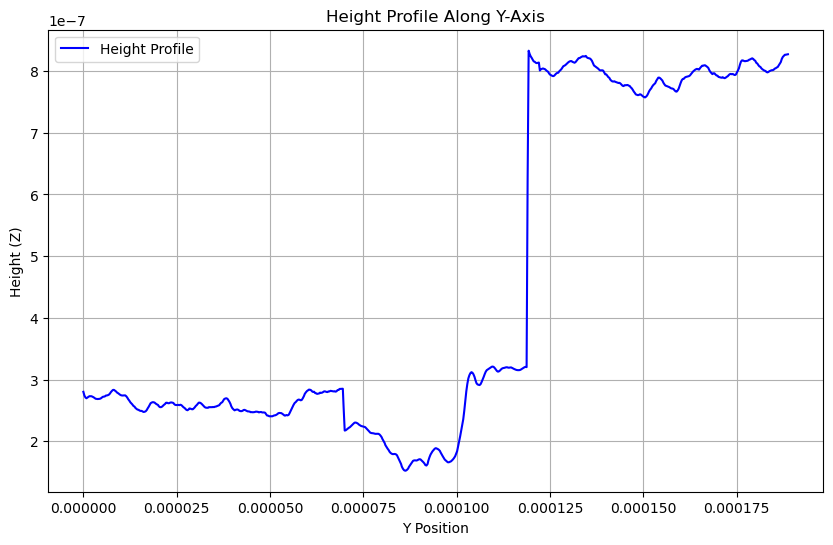

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data from a file
csv_file_path = r'C:\Users\judit\OneDrive\Desktop\combined_shifted_data.csv'  # Update this with the actual file path
data = pd.read_csv(csv_file_path)

# Generate the height profile along the y-axis
y_profile = data.groupby('Y')['Z'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(y_profile['Y'], y_profile['Z'], label='Height Profile', color='blue')

# Add labels and title
plt.xlabel('Y Position')
plt.ylabel('Height (Z)')
plt.title('Height Profile Along Y-Axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

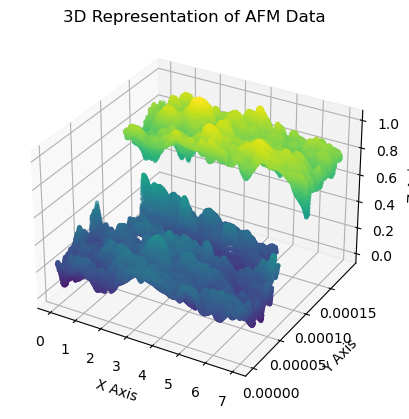

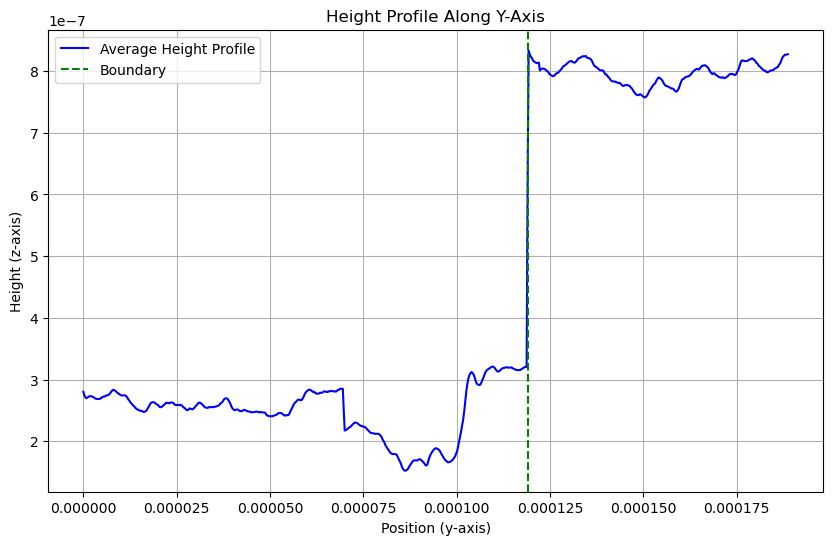

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV data

file_path = r'C:\Users\judit\OneDrive\Desktop\combined_shifted_data.csv'
data = pd.read_csv(file_path)

# Assuming the CSV has columns named 'x', 'y', and 'z'
x = data['X']
y = data['Y']
z = data['Z']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')

# Setting labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Representation of AFM Data')

plt.show()

# Group the data by y-axis values and calculate the average z-value for each y to create a profile plot
profile_data_y = data.groupby('Y')['Z'].mean().reset_index()

# Create a 2D plot for the y-axis vs. height (z-axis)
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['Y'], profile_data_y['Z'], label='Average Height Profile', color='blue')

# Highlighting the boundary area along the y-axis
boundary_y = profile_data_y.loc[profile_data_y['Z'].diff().abs().idxmax()]['Y']
plt.axvline(x=boundary_y, color='green', linestyle='--', label='Boundary')

# Adding labels and title
plt.xlabel('Position (y-axis)')
plt.ylabel('Height (z-axis)')
plt.title('Height Profile Along Y-Axis')
plt.legend()

plt.grid(True)
plt.show()

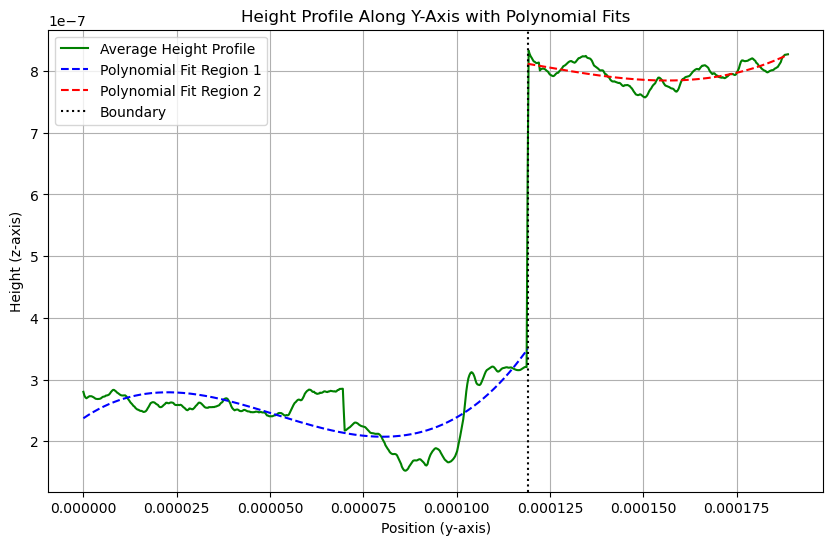

In [19]:
#polynomial datafit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv(file_path)

# Group the data by y-axis values and calculate the average z-value for each y to create a profile plot
profile_data_y = data.groupby('Y')['Z'].mean().reset_index()
boundary_y = profile_data_y.loc[profile_data_y['Z'].diff().abs().idxmax()]['Y']
# Define the regions for polynomial fitting
region1 = profile_data_y[profile_data_y['Y'] <= boundary_y]
region2 = profile_data_y[profile_data_y['Y'] >= boundary_y]

# Polynomial regression function
def polynomial_regression(x, y, degree=3):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    return y_poly_pred, model

# Fit polynomial regression for region1 and region2
y_poly_pred_region1, model1 = polynomial_regression(region1['Y'].values, region1['Z'].values, degree=3)
y_poly_pred_region2, model2 = polynomial_regression(region2['Y'].values, region2['Z'].values, degree=3)

# Plot the original data and the polynomial fits
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['Y'], profile_data_y['Z'], label='Average Height Profile', color='green')
plt.plot(region1['Y'], y_poly_pred_region1, label='Polynomial Fit Region 1', color='blue', linestyle='--')
plt.plot(region2['Y'], y_poly_pred_region2, label='Polynomial Fit Region 2', color='red', linestyle='--')

# Highlighting the boundary area along the y-axis
plt.axvline(x=boundary_y, color='black', linestyle=':', label='Boundary')
# Adding labels and title
plt.xlabel('Position (y-axis)')
plt.ylabel('Height (z-axis)')
plt.title('Height Profile Along Y-Axis with Polynomial Fits')
plt.legend()

plt.grid(True)
plt.show()


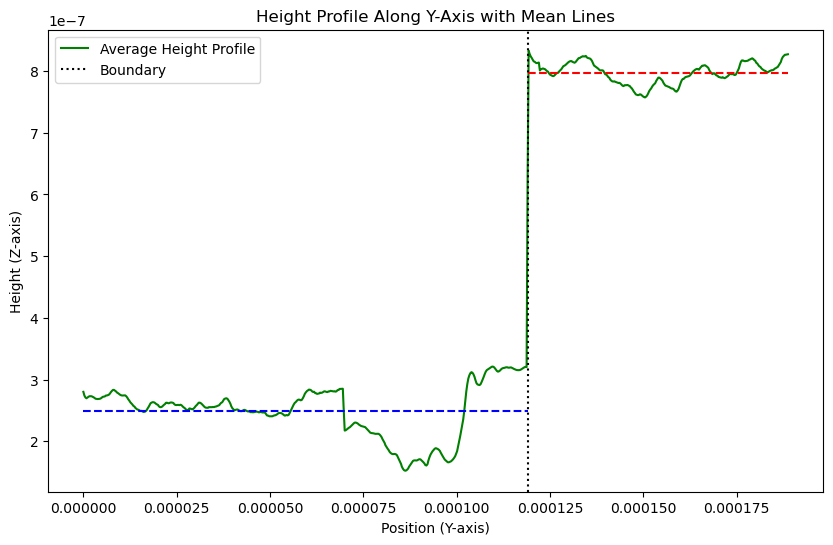

unirradiated region mean height: 249.43274181205686 nm
irradiated region mean height: 797.0866881127452 nm


In [35]:
#linear mean datafit
# Calculate the mean values for the regions
mean_region1 = region1['Z'].mean()
mean_region2 = region2['Z'].mean()

# Plot the original data and the mean lines
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['Y'], profile_data_y['Z'], label='Average Height Profile', color='green')
plt.hlines(mean_region1, xmin=profile_data_y['Y'].min(), xmax=boundary_y, colors='blue', linestyles='--')
plt.hlines(mean_region2, xmin=boundary_y, xmax=profile_data_y['Y'].max(), colors='red', linestyles='--')

# Highlighting the boundary area along the y-axis
plt.axvline(x=boundary_y, color='black', linestyle=':', label='Boundary')
# Adding labels and title
plt.xlabel('Position (Y-axis)')
plt.ylabel('Height (Z-axis)')
plt.title('Height Profile Along Y-Axis with Mean Lines')
plt.legend()

plt.grid(False)
plt.show()
print ("unirradiated region mean height:",mean_region1 * 1e09,"nm")
print("irradiated region mean height:", mean_region2 * 1e09,"nm")

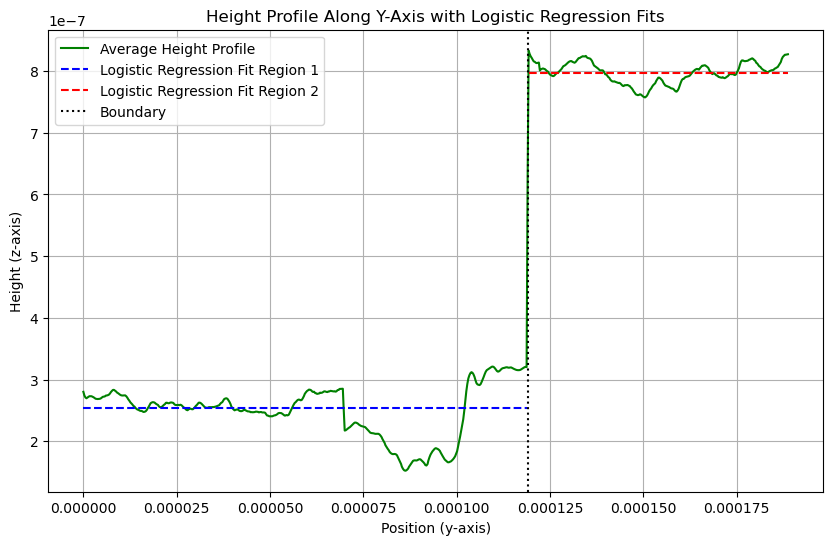

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data = pd.read_csv(file_path)

# Group the data by y-axis values and calculate the average z-value for each y to create a profile plot
profile_data_y = data.groupby('Y')['Z'].mean().reset_index()
boundary_y = profile_data_y.loc[profile_data_y['Z'].diff().abs().idxmax()]['Y']

# Define the regions for logistic regression
region1 = profile_data_y[profile_data_y['Y'] < boundary_y]
region2 = profile_data_y[profile_data_y['Y'] > boundary_y]

# Fit Logistic Regression for region1
log_reg1 = LogisticRegression()
X_region1 = region1[['Y']].values
y_region1 = (region1['Z'] > region1['Z'].mean()).astype(int)  # Binary classification based on mean Z
log_reg1.fit(X_region1, y_region1)
y_pred_prob_region1 = log_reg1.predict_proba(X_region1)[:, 1]

# Fit Logistic Regression for region2
log_reg2 = LogisticRegression()
X_region2 = region2[['Y']].values
y_region2 = (region2['Z'] > region2['Z'].mean()).astype(int)  # Binary classification based on mean Z
log_reg2.fit(X_region2, y_region2)
y_pred_prob_region2 = log_reg2.predict_proba(X_region2)[:, 1]

# Plot the original data and the logistic regression fits
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['Y'], profile_data_y['Z'], label='Average Height Profile', color='green')
plt.plot(region1['Y'], y_pred_prob_region1 * (region1['Z'].max() - region1['Z'].min()) + region1['Z'].min(),
         label='Logistic Regression Fit Region 1', color='blue', linestyle='--')
plt.plot(region2['Y'], y_pred_prob_region2 * (region2['Z'].max() - region2['Z'].min()) + region2['Z'].min(),
         label='Logistic Regression Fit Region 2', color='red', linestyle='--')

# Highlighting the boundary area along the y-axis
plt.axvline(x=boundary_y, color='black', linestyle=':', label='Boundary')
# Adding labels and title
plt.xlabel('Position (y-axis)')
plt.ylabel('Height (z-axis)')
plt.title('Height Profile Along Y-Axis with Logistic Regression Fits')
plt.legend()

plt.grid(True)
plt.show()


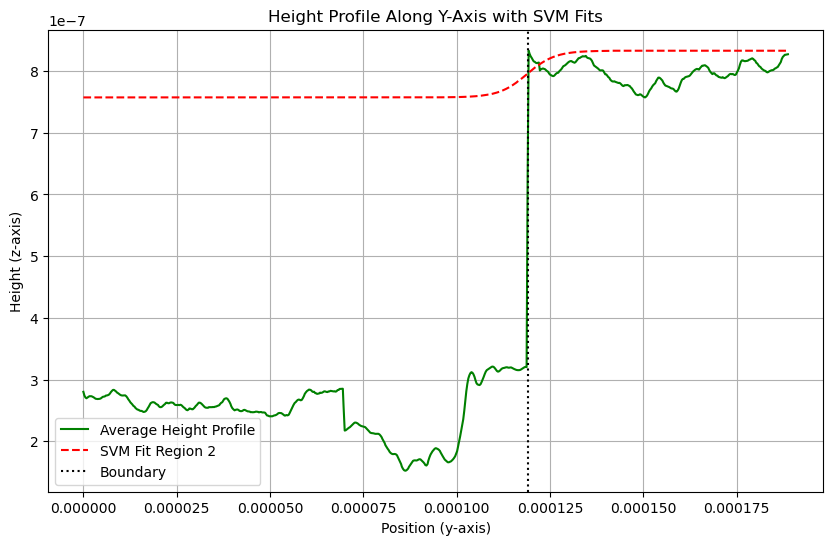

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(file_path)

# Group the data by y-axis values and calculate the average z-value for each y to create a profile plot
profile_data_y = data.groupby('Y')['Z'].mean().reset_index()
boundary_y = profile_data_y.loc[profile_data_y['Z'].diff().abs().idxmax()]['Y']

# Fit SVM for region2
X_region2 = profile_data_y[['Y']].values
y_region2 = (profile_data_y['Z'] > profile_data_y['Z'].mean()).astype(int)  # Binary classification based on mean Z
X_region2_scaled = scaler.fit_transform(X_region2)

svm2 = SVC(kernel="poly",probability=True,degree=1, gamma='scale')
svm2.fit(X_region2_scaled, y_region2)
y_pred_prob_region2 = svm2.predict_proba(X_region2_scaled)[:, 1]

# Plot the original data and the SVM fits
plt.figure(figsize=(10, 6))
plt.plot(profile_data_y['Y'], profile_data_y['Z'], label='Average Height Profile', color='green')
plt.plot(profile_data_y['Y'], y_pred_prob_region2 * (region2['Z'].max() - region2['Z'].min()) + region2['Z'].min(),
         label='SVM Fit Region 2', color='red', linestyle='--')

# Highlighting the boundary area along the y-axis
plt.axvline(x=boundary_y, color='black', linestyle=':', label='Boundary')
# Adding labels and title
plt.xlabel('Position (y-axis)')
plt.ylabel('Height (z-axis)')
plt.title('Height Profile Along Y-Axis with SVM Fits')
plt.legend()

plt.grid(True)
plt.show()
